# machine learning assignment with adult data

#### by Ansgar Lichter, Fabian Hupe & Jonas Mitschke

#### https://archive.ics.uci.edu/ml/datasets/Adult

## PROBLEM

### classification of personal data to predict the income-class (<=50k or >50k)

## INPUT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### get train-data

In [2]:
df = pd.read_csv(filepath_or_buffer='adult-data.txt', header=None)
len(df)

32561

In [3]:
column_names = ['age', 'workclass', 'final_weight', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'Class']

df.columns = column_names
df.head(15)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### get test-data

In [4]:
df_test = pd.read_csv(filepath_or_buffer='adult-test.txt', header=None)
len(df_test)

16281

In [5]:
column_names = ['age', 'workclass', 'final_weight', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'Class']

df_test.columns = column_names
df_test.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## PREPARATION 1

### note:
#### unknowns will be removed and the original train/test split will be used to ensure comparability with already reported results

### remove unknown values ('?') in data

In [6]:
# train-data
df = df[~(df.astype(str) == ' ?').any(1)]

# test-data
df_test = df_test[~(df_test.astype(str) == ' ?').any(1)]

## VISUALIZATION & UNDERSTANDING

### show features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   final_weight    30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  Class           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### check for missing values

In [8]:
df.isnull().values.any()

False

### generate descriptive statistics

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
final_weight,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education_num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
capital_gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
capital_loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
hours_per_week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


### summarize class distribution

In [10]:
from collections import Counter

In [11]:
target = df.values[:,-1]
counter = Counter(target)
for i,j in counter.items():
    per = j / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (i, j, per))

Class= <=50K, Count=22654, Percentage=75.108%
Class= >50K, Count=7508, Percentage=24.892%


### visualize distribution of each numerical input variable by histograms

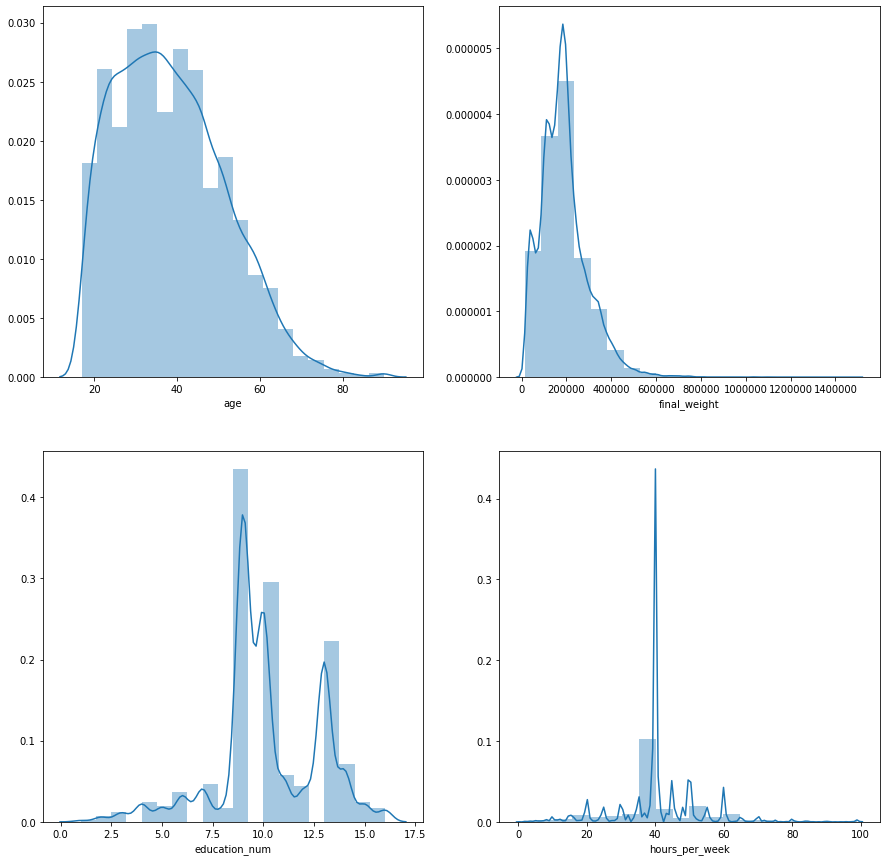

In [12]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
sns.distplot(df.age, bins = 20, ax=ax[0,0])
sns.distplot(df.final_weight, bins = 20, ax=ax[0,1])
sns.distplot(df.education_num, bins = 20, ax=ax[1,0])
sns.distplot(df.hours_per_week, bins = 20, ax=ax[1,1])

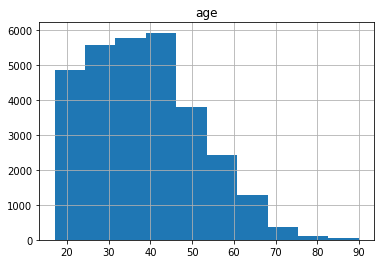

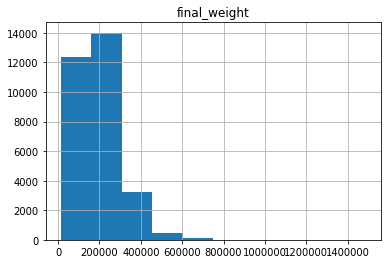

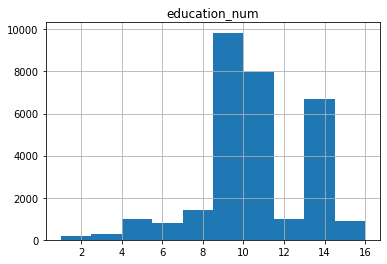

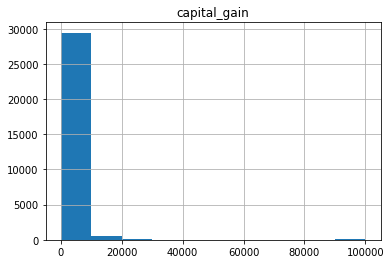

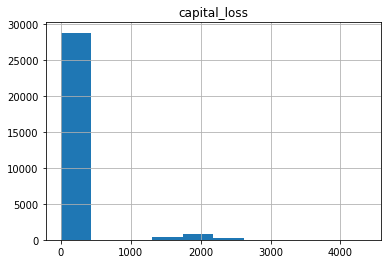

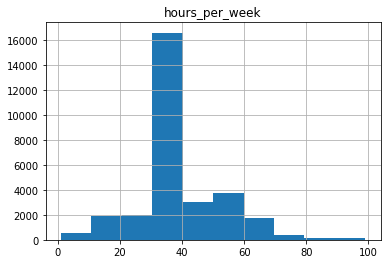

In [13]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
subset = df[numeric_columns]
for i, col in enumerate(subset.columns):
    subset[col].hist()
    plt.title(subset[col].name)
    plt.show()

### visualize distribution of each categorical input variable by histograms

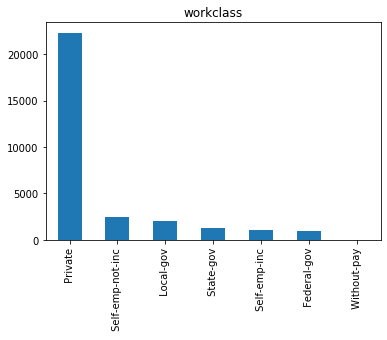

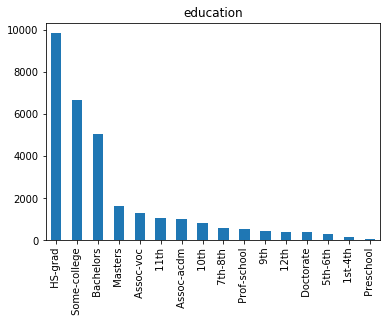

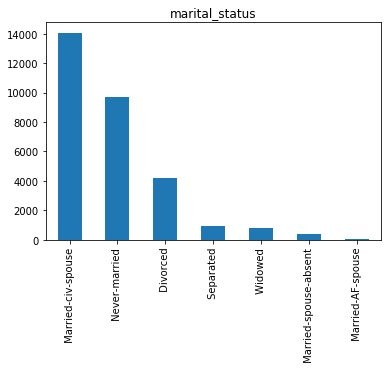

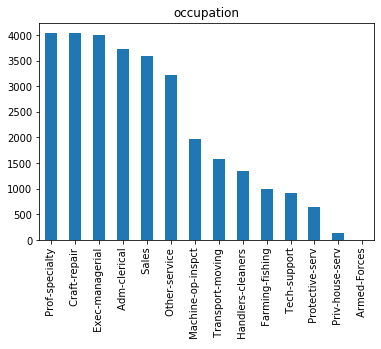

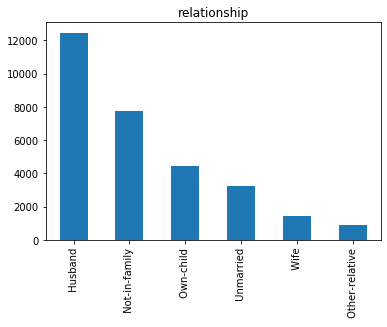

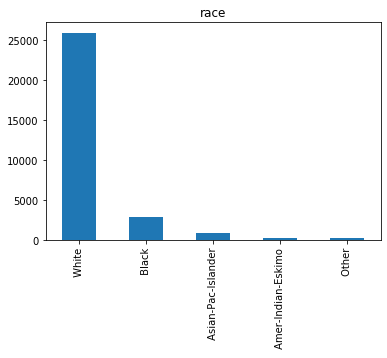

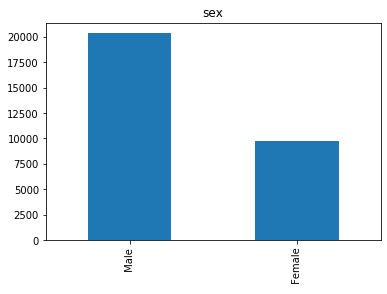

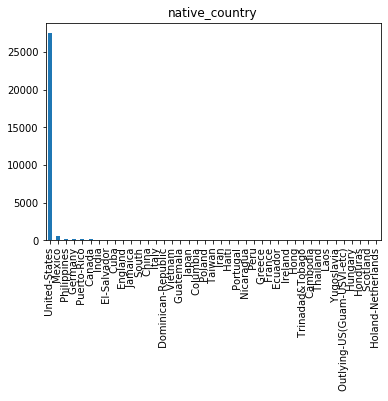

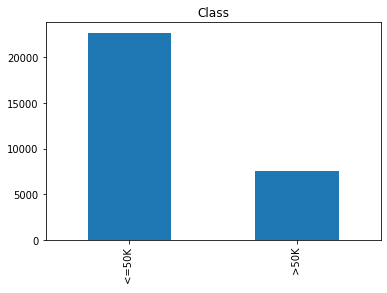

In [14]:
numeric_columns = df.select_dtypes(include=['object']).columns
subset = df[numeric_columns]
for i, col in enumerate(subset.columns):
    subset[col].value_counts().plot(kind='bar')
    plt.title(subset[col].name)
    plt.show()

### visualize correlation matrix

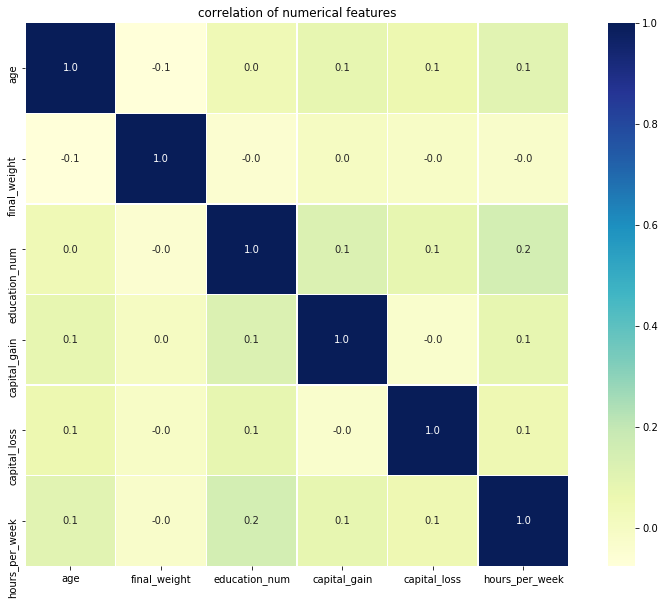

In [15]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('correlation of numerical features');

## PREPARATION 2

### encode data columns

In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

cols = df.columns[df.dtypes.eq('object')]

for col in cols:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


### split in features & label

In [17]:
# train-data
y_train = np.asarray(df.loc[:, 'Class'])
X_train = np.asarray(df.iloc[:, :-1])

# test-data
y_test = np.asarray(df_test.loc[:, 'Class'])
X_test = np.asarray(df_test.iloc[:, :-1])

## TRAINING

### note:
#### trying different classifiers to find the best fitting for the problem

### naive bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

### nearest neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
i = 1
knb_model_list = []

while i <= 50:
    knb = KNeighborsClassifier(n_neighbors=i)
    knb_model = knb.fit(X_train,y_train)
    knb_model_list.append(knb_model)
    i += 1

### stochastic gradient descent

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd = SGDClassifier()
sgd_model = sgd.fit(X_train, y_train)

### decision tree

In [24]:
from sklearn import tree

In [25]:
dt = tree.DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

### logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(random_state=0)
lr_model = lr.fit(X_train, y_train)

### support vector machine

In [28]:
from sklearn import svm

In [29]:
_svm = svm.SVC()
svm_model = _svm.fit(X_train, y_train)

### random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)

## EVALUATION

### metrics: accuracy, precision, recall & f1-score

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

### evaluate naive bayes model

accuracy: 0.7885790172642763
precision: 0.6469248291571754
recall: 0.307027027027027
f1-score: 0.41642228739002934


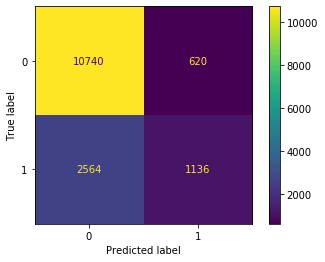

In [33]:
gnb_pred = gnb_model.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, gnb_pred)))
print("precision: " + str(precision_score(y_test, gnb_pred)))
print("recall: " + str(recall_score(y_test, gnb_pred)))
print("f1-score: " + str(f1_score(y_test, gnb_pred)))

cm = confusion_matrix(y_true = y_test, y_pred = gnb_pred)
plot_confusion_matrix(gnb_model, X_test, y_test, values_format='d')

### evaluate nearest neighbor models

In [34]:
acc_list = []
for model in knb_model_list:
    pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test, pred))

max acc: 0.7962151394422311 (k = 24)


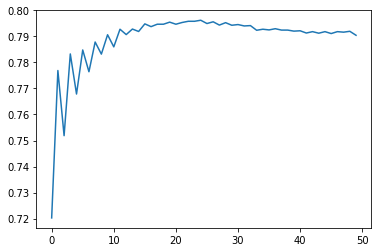

accuracy: 0.7962151394422311
precision: 0.8345705196182397
recall: 0.2127027027027027
f1-score: 0.33900495369373246


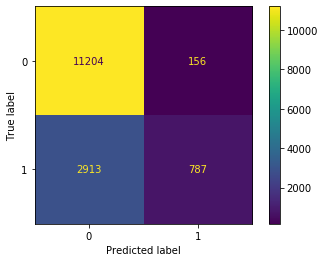

In [35]:
max_acc = max(acc_list)
max_acc_k = acc_list.index(max_acc)
text = 'max acc: ' + str(max_acc) + ' (k = ' + str(max_acc_k) + ')'
print(text)

plt.plot(acc_list)
plt.show()

knb_pred = knb_model_list[max_acc_k].predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, knb_pred)))
print("precision: " + str(precision_score(y_test, knb_pred)))
print("recall: " + str(recall_score(y_test, knb_pred)))
print("f1-score: " + str(f1_score(y_test, knb_pred)))

cm = confusion_matrix(y_true = y_test, y_pred = knb_pred)
plot_confusion_matrix(knb_model_list[max_acc_k], X_test, y_test, values_format='d')

### evaluate stochastic gradient descent model

accuracy: 0.7784196547144754
precision: 0.8258527827648114
recall: 0.12432432432432433
f1-score: 0.21611463471928588


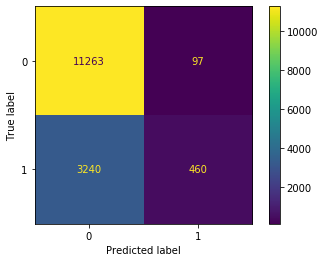

In [36]:
sgd_pred = sgd_model.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, sgd_pred)))
print("precision: " + str(precision_score(y_test, sgd_pred)))
print("recall: " + str(recall_score(y_test, sgd_pred)))
print("f1-score: " + str(f1_score(y_test, sgd_pred)))

cm = confusion_matrix(y_true = y_test, y_pred = sgd_pred)
plot_confusion_matrix(sgd_model, X_test, y_test, values_format='d')

### evaluate decision tree model

accuracy: 0.8024568393094289
precision: 0.5945734411687973
recall: 0.615945945945946
f1-score: 0.6050710208416301


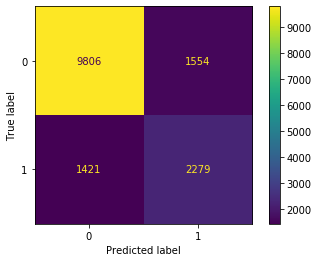

In [37]:
dt_pred = dt_model.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, dt_pred)))
print("precision: " + str(precision_score(y_test, dt_pred)))
print("recall: " + str(recall_score(y_test, dt_pred)))
print("f1-score: " + str(f1_score(y_test, dt_pred)))

cm = confusion_matrix(y_true = y_test, y_pred = dt_pred)
plot_confusion_matrix(dt_model, X_test, y_test, values_format='d')

### evaluate logisitic regression model

accuracy: 0.7835989375830014
precision: 0.6246466930469191
recall: 0.29864864864864865
f1-score: 0.40409581276284506


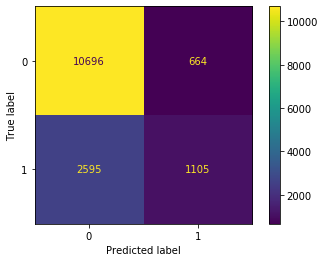

In [38]:
lr_pred = lr_model.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, lr_pred)))
print("precision: " + str(precision_score(y_test, lr_pred)))
print("recall: " + str(recall_score(y_test, lr_pred)))
print("f1-score: " + str(f1_score(y_test, lr_pred)))

cm = confusion_matrix(y_true = y_test, y_pred = lr_pred)
plot_confusion_matrix(lr_model, X_test, y_test, values_format='d')

### evaluate support vector machine model

accuracy: 0.7908366533864541
precision: 0.967687074829932
recall: 0.1537837837837838
f1-score: 0.2653917910447761


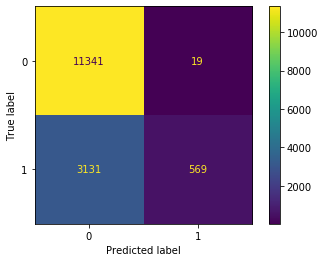

In [39]:
svm_pred = svm_model.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, svm_pred)))
print("precision: " + str(precision_score(y_test, svm_pred)))
print("recall: " + str(recall_score(y_test, svm_pred)))
print("f1-score: " + str(f1_score(y_test, svm_pred)))

cm = confusion_matrix(y_true = y_test, y_pred = svm_pred)
plot_confusion_matrix(svm_model, X_test, y_test, values_format='d')

### evaluate random forest model

accuracy: 0.849136786188579
precision: 0.733180927498367
recall: 0.6067567567567568
f1-score: 0.6640047323277136


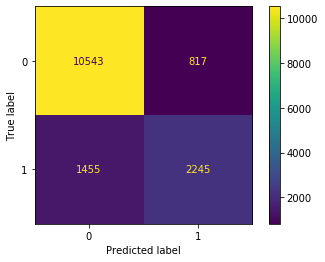

In [40]:
rfc_pred = rfc_model.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, rfc_pred)))
print("precision: " + str(precision_score(y_test, rfc_pred)))
print("recall: " + str(recall_score(y_test, rfc_pred)))
print("f1-score: " + str(f1_score(y_test, rfc_pred)))

cm = confusion_matrix(y_true = y_test, y_pred = rfc_pred)
plot_confusion_matrix(rfc_model, X_test, y_test, values_format='d')

## INTERPRETATION

#### best accuracy was 0,8491 and the best f1-score was 0,6640 (both with random forest)
#### so the random-forest-model shows the best results of the evaluated models for the available data
#### only the decision-tree-model has better balanced precsion and recall values (similar values for the false negative and false positive). In comparision to the random-forest-model this is due to higher false positive values and results in a lower f1-score for the decision-tree-model
#### the precision of the random-forest-model is 0,7331, which is about average (precision avg of trained models: 0,7467). The recall (0,6067) is high above average (recall avg of trained models: 0,3313), which is the reason for the highest f1-score of the evaluated models

### we recommend using the random forest to predict the income class for the available data